In [1]:
from supabase import create_client
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

In [2]:
SUPABASE_URL = os.getenv("SUPABASE_URL")
SUPABASE_KEY = os.getenv("SUPABASE_KEY")

In [3]:
supabase = create_client(SUPABASE_URL, SUPABASE_KEY)

In [4]:
response = supabase.table("team_stats").select("*").execute()
df = pd.DataFrame(response.data)

In [5]:
df.head(10)

,team_id,team_name,league_id,league_name,season,fixtures_played,fixtures_wins,fixtures_draws,fixtures_loses,goals_for,...,cards_red,avg_possession,avg_shots,avg_shots_on_target,avg_corners,avg_fouls,avg_yellow_cards,avg_red_cards,form,updated_at
0,40,Liverpool,39,Premier League,2021,38,28,8,2,94,...,1,None,None,None,None,None,None,None,WWDWWDDWWDLWWWWWWDLDWWWWWWWWWWDWWWDWWW,2025-11-21T02:42:10.486973+00:00
1,40,Liverpool,39,Premier League,2022,38,19,10,9,75,...,1,None,None,None,None,None,None,None,DDLWWDDLWWLLWWWWLLDLWWDWWLLDDWWWWWWWDD,2025-11-21T02:42:12.331205+00:00
2,40,Liverpool,39,Premier League,2023,38,24,10,4,86,...,5,None,None,None,None,None,None,None,DWWWWWLDWWDWDWWWDDWWWWLWWWWDWWDLWLDWDW,2025-11-21T02:35:15.872721+00:00
3,33,Manchester United,39,Premier League,2021,38,16,10,12,57,...,2,None,None,None,None,None,None,None,WDWWWLDLLWLLDWWWDWLDWWDDWWDLWDLWLLDWLL,2025-11-21T03:00:27.179427+00:00
4,33,Manchester United,39,Premier League,2022,38,23,6,9,58,...,2,None,None,None,None,None,None,None,LLWWWWLWDWDWLWWWWWDLWDWWLDLWWWDWLLWWWW,2025-11-21T03:00:28.997191+00:00
5,33,Manchester United,39,Premier League,2023,38,18,6,14,57,...,1,None,None,None,None,None,None,None,WLWLLWLWWLWWWLWLDLWLDWWWWLLWDLDDWDLLWW,2025-11-21T03:00:30.899031+00:00
6,42,Arsenal,39,Premier League,2021,38,22,3,13,61,...,4,None,None,None,None,None,None,None,LLLWWWDDWWWLWLLWWWWLDWWWWWLWLLLWWWWLLW,2025-11-21T03:00:32.680501+00:00
7,42,Arsenal,39,Premier League,2022,38,26,6,6,88,...,0,None,None,None,None,None,None,None,WWWWWLWWWWDWWWWWDWWLDLWWWWWWWDDDLWWLLW,2025-11-21T03:00:34.468245+00:00
8,42,Arsenal,39,Premier League,2023,38,28,5,5,91,...,2,None,None,None,None,None,None,None,WWDWWDWWDWLWWWWLWDLLWWWWWWWWDWWLWWWWWW,2025-11-21T03:00:36.216333+00:00


In [6]:
# Filtramos solo la temporada 2023
df_2023 = df[df["season"] == 2023].copy().reset_index(drop=True)

# Calculamos puntos
df_2023["points"] = df_2023["fixtures_wins"] * 3 + df_2023["fixtures_draws"]

# Ordenamos por puntos
df_2023 = df_2023.sort_values("points", ascending=False).reset_index(drop=True)
df_2023["position"] = df_2023.index + 1

print(f"Equipos en temporada 2023: {len(df_2023)}")
df_2023[["position", "team_name", "fixtures_played", "fixtures_wins", "fixtures_draws", "fixtures_loses", "goals_for", "goals_against", "points"]].head(10)

Equipos en temporada 2023: 3


,position,team_name,fixtures_played,fixtures_wins,fixtures_draws,fixtures_loses,goals_for,goals_against,points
0,1,Arsenal,38,28,5,5,91,29,89
1,2,Liverpool,38,24,10,4,86,41,82
2,3,Manchester United,38,18,6,14,57,58,60


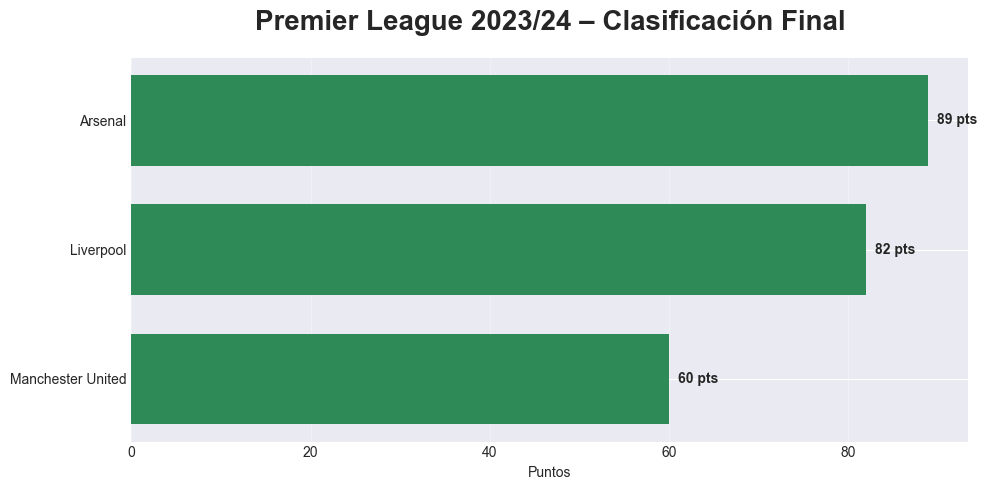

In [7]:
# 1. Tabla de posiciones
plt.figure(figsize=(10, 5))
top = df_2023.sort_values("points", ascending=True)
bars = plt.barh(top["team_name"], top["points"], color="#2E8B57", height=0.7)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())} pts', va='center', fontweight='bold')

plt.title("Premier League 2023/24 – Clasificación Final", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Puntos")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

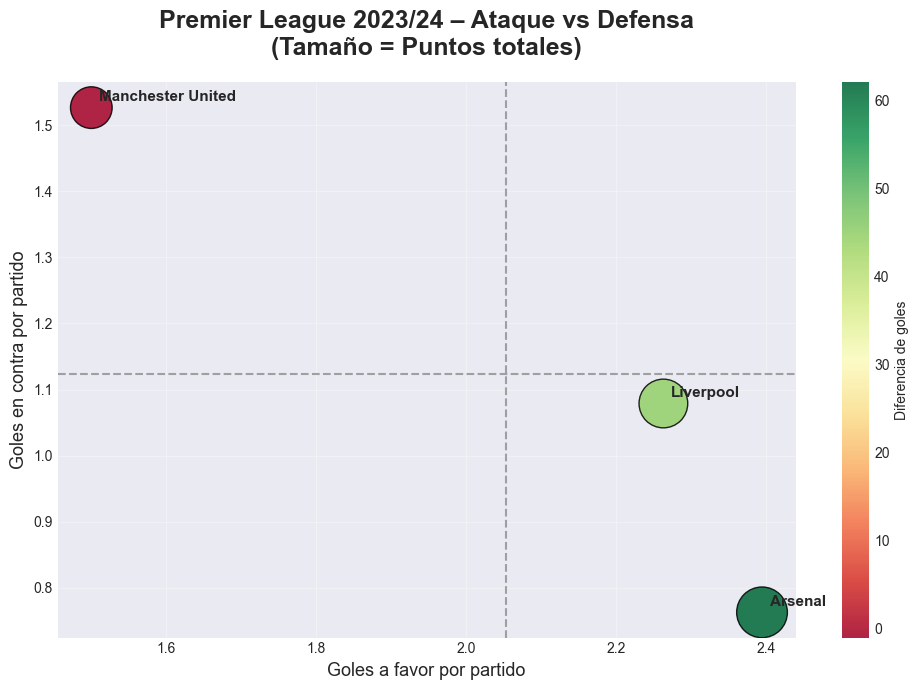

In [8]:
# Añadimos métricas por partido
df_2023["gf_per_game"] = df_2023["goals_for"] / df_2023["fixtures_played"]
df_2023["ga_per_game"] = df_2023["goals_against"] / df_2023["fixtures_played"]

plt.figure(figsize=(10, 7))

# Scatter: tamaño del punto = puntos totales, color = diferencia de goles
scatter = plt.scatter(df_2023["gf_per_game"], 
                      df_2023["ga_per_game"],
                      s=df_2023["points"] * 15,           # tamaño proporcional a puntos
                      c=df_2023["goal_difference"], 
                      cmap="RdYlGn", 
                      alpha=0.85, 
                      edgecolors="black", 
                      linewidth=1)

# Etiquetas solo para los equipos importantes
for i, row in df_2023.iterrows():
    if row["position"] <= 4 or row["position"] >= 18 or "City" in row["team_name"] or "Arsenal" in row["team_name"] or "Liverpool" in row["team_name"]:
        plt.text(row["gf_per_game"] + 0.01, 
                 row["ga_per_game"] + 0.01, 
                 row["team_name"], 
                 fontsize=11, fontweight="bold")

# Líneas de media
plt.axvline(df_2023["gf_per_game"].mean(), color="gray", linestyle="--", alpha=0.7)
plt.axhline(df_2023["ga_per_game"].mean(), color="gray", linestyle="--", alpha=0.7)

plt.colorbar(scatter, label="Diferencia de goles")
plt.xlabel("Goles a favor por partido", fontsize=13)
plt.ylabel("Goles en contra por partido", fontsize=13)
plt.title("Premier League 2023/24 – Ataque vs Defensa\n(Tamaño = Puntos totales)", 
          fontsize=18, fontweight="bold", pad=20)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

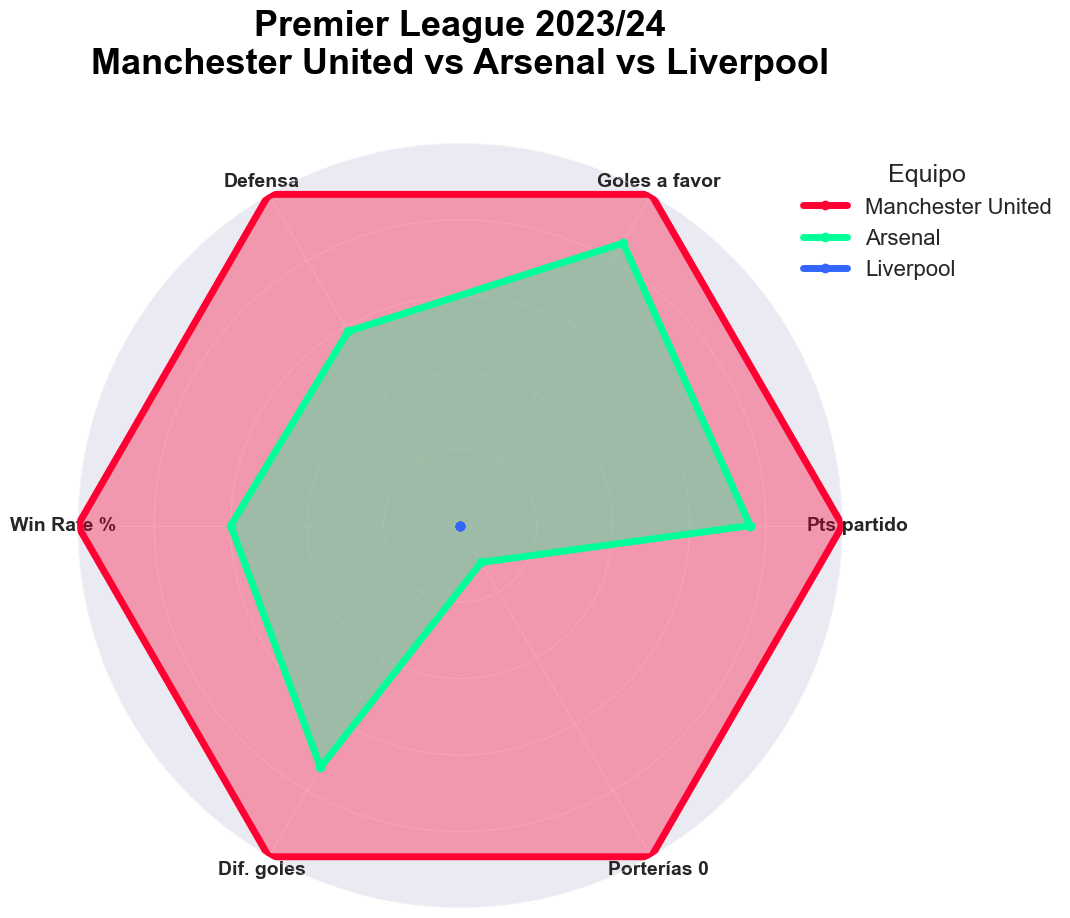

In [9]:
teams = ["Manchester United", "Arsenal", "Liverpool"]
radar_df = df_2023[df_2023["team_name"].isin(teams)].set_index("team_name")

# Métricas (38 partidos = temporada completa)
radar_df["pts_per_game"]     = radar_df["points"] / 38
radar_df["gf_per_game"]      = radar_df["goals_for"] / 38
radar_df["defensa_inv"]      = 3.5 - (radar_df["goals_against"] / 38)   # cuanto más alto, mejor defensa
radar_df["win_rate"]         = radar_df["fixtures_wins"] / 38 * 100
radar_df["clean_sheet_rate"] = radar_df["clean_sheets"] / 38 * 100
radar_df["goal_diff_adj"]    = radar_df["goal_difference"] + 60         # para que no sea negativo

# Seleccionamos las 6 métricas
stats = radar_df[["pts_per_game", "gf_per_game", "defensa_inv", 
                  "win_rate", "goal_diff_adj", "clean_sheet_rate"]]

# Normalizamos a 0–100
stats_norm = (stats - stats.min()) / (stats.max() - stats.min()) * 100
stats_norm = stats_norm.fillna(50)

# Configuración del radar
angles = np.linspace(0, 2*np.pi, 6, endpoint=False).tolist()
angles += angles[:1]   # cerrar el círculo

fig, ax = plt.subplots(figsize=(11, 11), subplot_kw=dict(polar=True))

# COLORES DISTINTOS Y BRUTALES
colors = ["#FF0033", "#00FF99", "#3366FF"]   # Rojo United | Verde Arsenal | Azul Liverpool
labels = ["Manchester United", "Arsenal", "Liverpool"]

for i, team in enumerate(stats_norm.index):
    values = stats_norm.loc[team].tolist()
    values += values[:1]   # cerrar el polígono
    ax.plot(angles, values, 'o-', linewidth=5, color=colors[i], label=labels[i])
    ax.fill(angles, values, color=colors[i], alpha=0.35)

# Etiquetas de las categorías
ax.set_xticks(angles[:-1])
ax.set_xticklabels([
    "Pts/partido", "Goles a favor", "Defensa", 
    "Win Rate %", "Dif. goles", "Porterías 0"
], fontsize=14, fontweight="bold")

ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels([])   # quitamos números para que quede limpio
ax.grid(True, alpha=0.7)

plt.title("Premier League 2023/24\nManchester United vs Arsenal vs Liverpool", 
          size=26, fontweight="bold", pad=50, color="black")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0), fontsize=16, title="Equipo", title_fontsize=18)

plt.tight_layout()
plt.show()